In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

df=pd.read_csv("C:\\Users\\91721\\Downloads\\SBIN.NS (2).csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2013,240.490005,243.404999,239.755005,242.645004,221.025604,17202300
1,02-01-2013,245.000000,246.399994,243.815002,245.054993,223.220871,14660120
2,03-01-2013,246.000000,248.240005,243.619995,247.160004,225.138336,20103090
3,04-01-2013,246.000000,249.294998,245.065002,248.669998,226.513794,13705950
4,07-01-2013,249.000000,249.899994,246.175003,246.759995,224.773972,10264490


In [3]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
df['Date']=pd.to_datetime(df.Date)
df.shape

(1299, 7)

In [30]:
df.drop('Adj Close',axis=1,inplace=True)
df['Volume']=df['Volume'].astype(float)

KeyError: 'Volume'

In [6]:
df.head()

,Date,Open,High,Low,Close
0,2013-01-01,240.490005,243.404999,239.755005,242.645004
1,2013-02-01,245.000000,246.399994,243.815002,245.054993
2,2013-03-01,246.000000,248.240005,243.619995,247.160004
3,2013-04-01,246.000000,249.294998,245.065002,248.669998
4,2013-07-01,249.000000,249.899994,246.175003,246.759995


In [7]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [8]:
df.isna().any()

Date     False
Open     False
High     False
Low      False
Close    False
dtype: bool

In [9]:
df_new = df[np.isfinite(df).all(1)]

<AxesSubplot:>

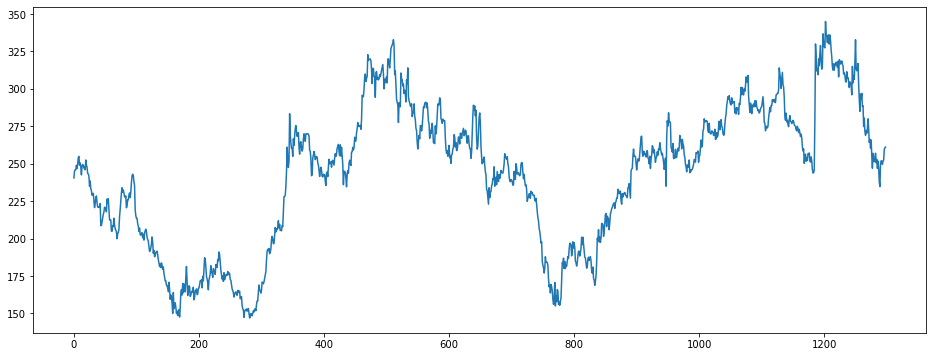

In [10]:
df_new['Open'].plot(figsize=(16,6))

In [12]:
x=df_new[['Open','High','Low','Volume']]
y=df_new['Close']   

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [14]:
x_train.shape

(974, 3)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor=LinearRegression()

In [16]:
regressor.fit(x_train,y_train)

LinearRegression()

In [17]:
print(regressor.coef_)

[-0.70125341  0.85910802  0.8410327 ]


In [18]:
print(regressor.intercept_)

0.1613825373908071


In [19]:
predicted=regressor.predict(x_test)
print(x_test)

            Open        High         Low
579   269.899994  275.000000  268.049988
1013  277.799988  278.250000  270.200012
759   173.100006  177.399994  168.600006
446   260.899994  261.359985  256.510010
186   161.380005  162.800003  159.664993
...          ...         ...         ...
638   282.500000  289.950012  276.399994
440   250.455002  254.399994  249.235001
737   225.949997  226.550003  224.000000
878   227.750000  231.000000  226.800003
82    227.500000  232.684998  226.514999

[325 rows x 3 columns]


In [20]:
predicted.shape

(325,)

In [21]:
dframe=pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})
print(dfr)

          Actual   Predicted
579   274.299988  272.586603
1013  271.649994  271.647047
759   169.399994  172.978290
446   257.524994  257.474139
186   161.490005  161.139373
...          ...         ...
638   288.600006  283.617109
440   252.354996  252.700820
737   224.449997  224.735427
878   229.250000  229.651091
82    229.945007  231.034302

[325 rows x 2 columns]


<AxesSubplot:>

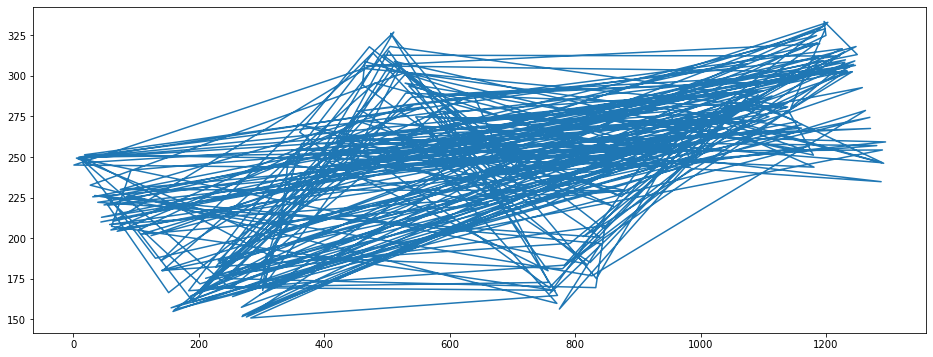

In [28]:
#,dfr['Actual'])
dfr['Actual'].plot(figsize=(16,6))
#plt.plot(df_new.Date[0:325], dfr.Actual)
